In [1]:
# On importe les librairies dont on aura besoin pour la Question1
import os
from utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

from sklearn import preprocessing

In [2]:
#------------Task_0: Chargement et normalisation des donnees----------------------------------------#
data = load_HDR_data()
#data = np.array(data)

In [3]:
X_scaled = preprocessing.scale(data["X"])

In [4]:
X_scaled.shape

(138, 45)

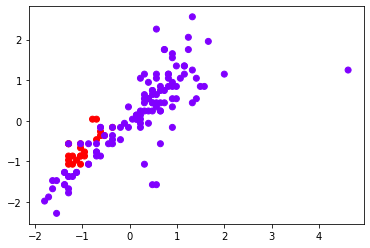

In [5]:
#-----------task_1: regroupement des instances en ++ groupes: choix du meilleur clustering-----------------#

kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X_scaled)

plt.scatter(X_scaled[:,0],X_scaled[:,1], c=kmeans.labels_, cmap='rainbow')

Text(0, 0.5, 'Inertia')

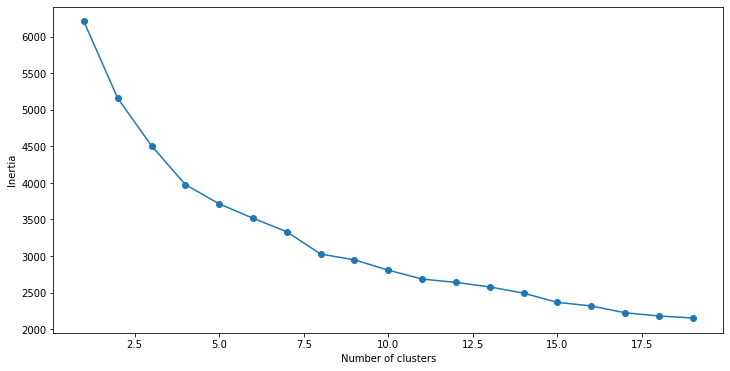

In [6]:
#-Votre deuxième tâche consiste à regrouper les données HDR avec l'algorithme k-means pourk = 2 ... 10 grappes. 
#Choisissez un cluster  (pas assez de grappes, assez de grappes, trop de grappes).puis commenter


SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
